### K-Means Clustering


### import file

In [1]:
import numpy as np

# read data
data = np.genfromtxt("shopping-data.csv", delimiter=',', dtype=None, encoding = 'latin-1', names=True)

# inital import test
data.shape

(200,)

### Reshape and concatenate

In [2]:
# reshape
x1 = np.reshape(data["age"],(-1,1))
x2 = np.reshape(data["income"],(-1,1))

X = np.concatenate((x1,x2),axis=1)

### Normalize features

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# find MIN and MAX value in each cloumn of array X.  
scaler.fit(X) 
X = scaler.transform(X)
#print(X)

### Visualize data

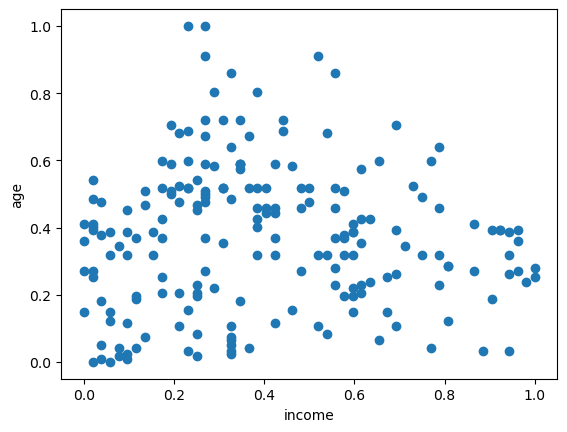

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.xlabel("income")
plt.ylabel("age")
plt.show()

In [5]:
# graph function
def graph_cluster(X, km_array, centroids):
    for i in range(X.shape[0]):
        if km_array[i] == 0:
            plt.scatter(X[i,0], X[i,1], color='blue', s = 50)
        elif km_array[i] == 1:
            plt.scatter(X[i,0], X[i,1], color='green', s = 50)
        elif km_array[i] == 2:
            plt.scatter(X[i,0], X[i,1], color='black', s = 50)
        else:
            plt.scatter(X[i,0], X[i,1], color='grey', s = 50)  # just in case...
   
    plt.scatter(centroids[:,0], centroids[:,1], marker='X', color='red', s = 50)
    plt.xlabel("income")
    plt.ylabel("age")
    plt.show()

### Create model and fit: cluster = 3

In [6]:
from sklearn.cluster import KMeans as km

km_model_3 = km(n_clusters=3)
km_model_3.fit(X)

KMeans(n_clusters=3)

### Predict KMeans

In [7]:
km_model_predict_array = km_model_3.predict(X)   # returns list of cluster numbers to which each single object of the input array X belongs
print(km_model_predict_array.size)
print(km_model_predict_array)

200
[2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1
 2 2 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 0 2 1 1 0 1 1 2 1 1 2 0 1 1 2 1 0 0 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 0 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


### find Centroids

In [8]:
centroids_array = km_model_3.cluster_centers_
print(centroids_array)

[[0.31098178 0.56794651]
 [0.71756602 0.3126988 ]
 [0.14878543 0.18550475]]


### Call the pretty graph function

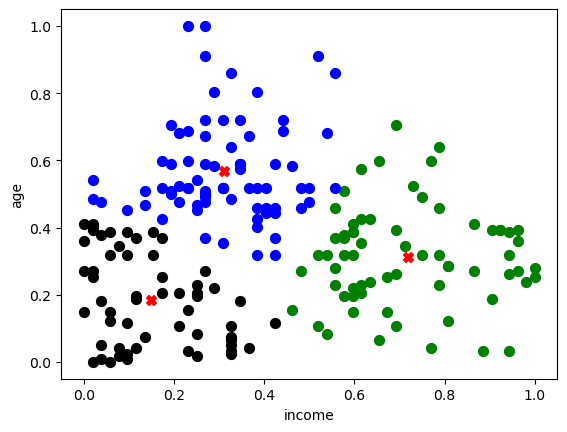

In [9]:
 graph_cluster(X, km_model_predict_array, centroids_array)

### Create model and fit: cluster = 4

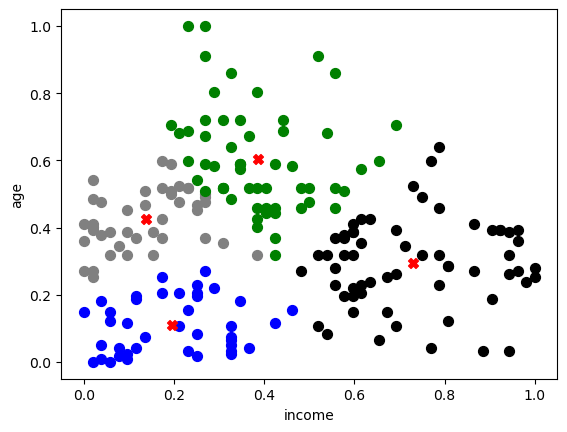

In [10]:
# generate cluster as a function of cluster size
km_model_4 = km(n_clusters=4)
km_model_4.fit(X)
    
# predict
km_model_predict = km_model_4.predict(X) 

# get centroids
centroids_array_4 = km_model_4.cluster_centers_
    
# graph
graph_cluster(X, km_model_predict, centroids_array_4)

### Create Heirarchical Clustering Dendogram

In [12]:
# function for model and graph
import scipy.cluster.hierarchy as shc

def heir_and_graph(X, method, metric):
    plt.figure(figsize=(30,12))
    clusters_agg = shc.linkage(X, method = method, metric = metric)  #  Agglomerate clustering
    dendo = shc.dendrogram(clusters_agg, orientation = 'top', labels = data["ID"], leaf_rotation = 90)

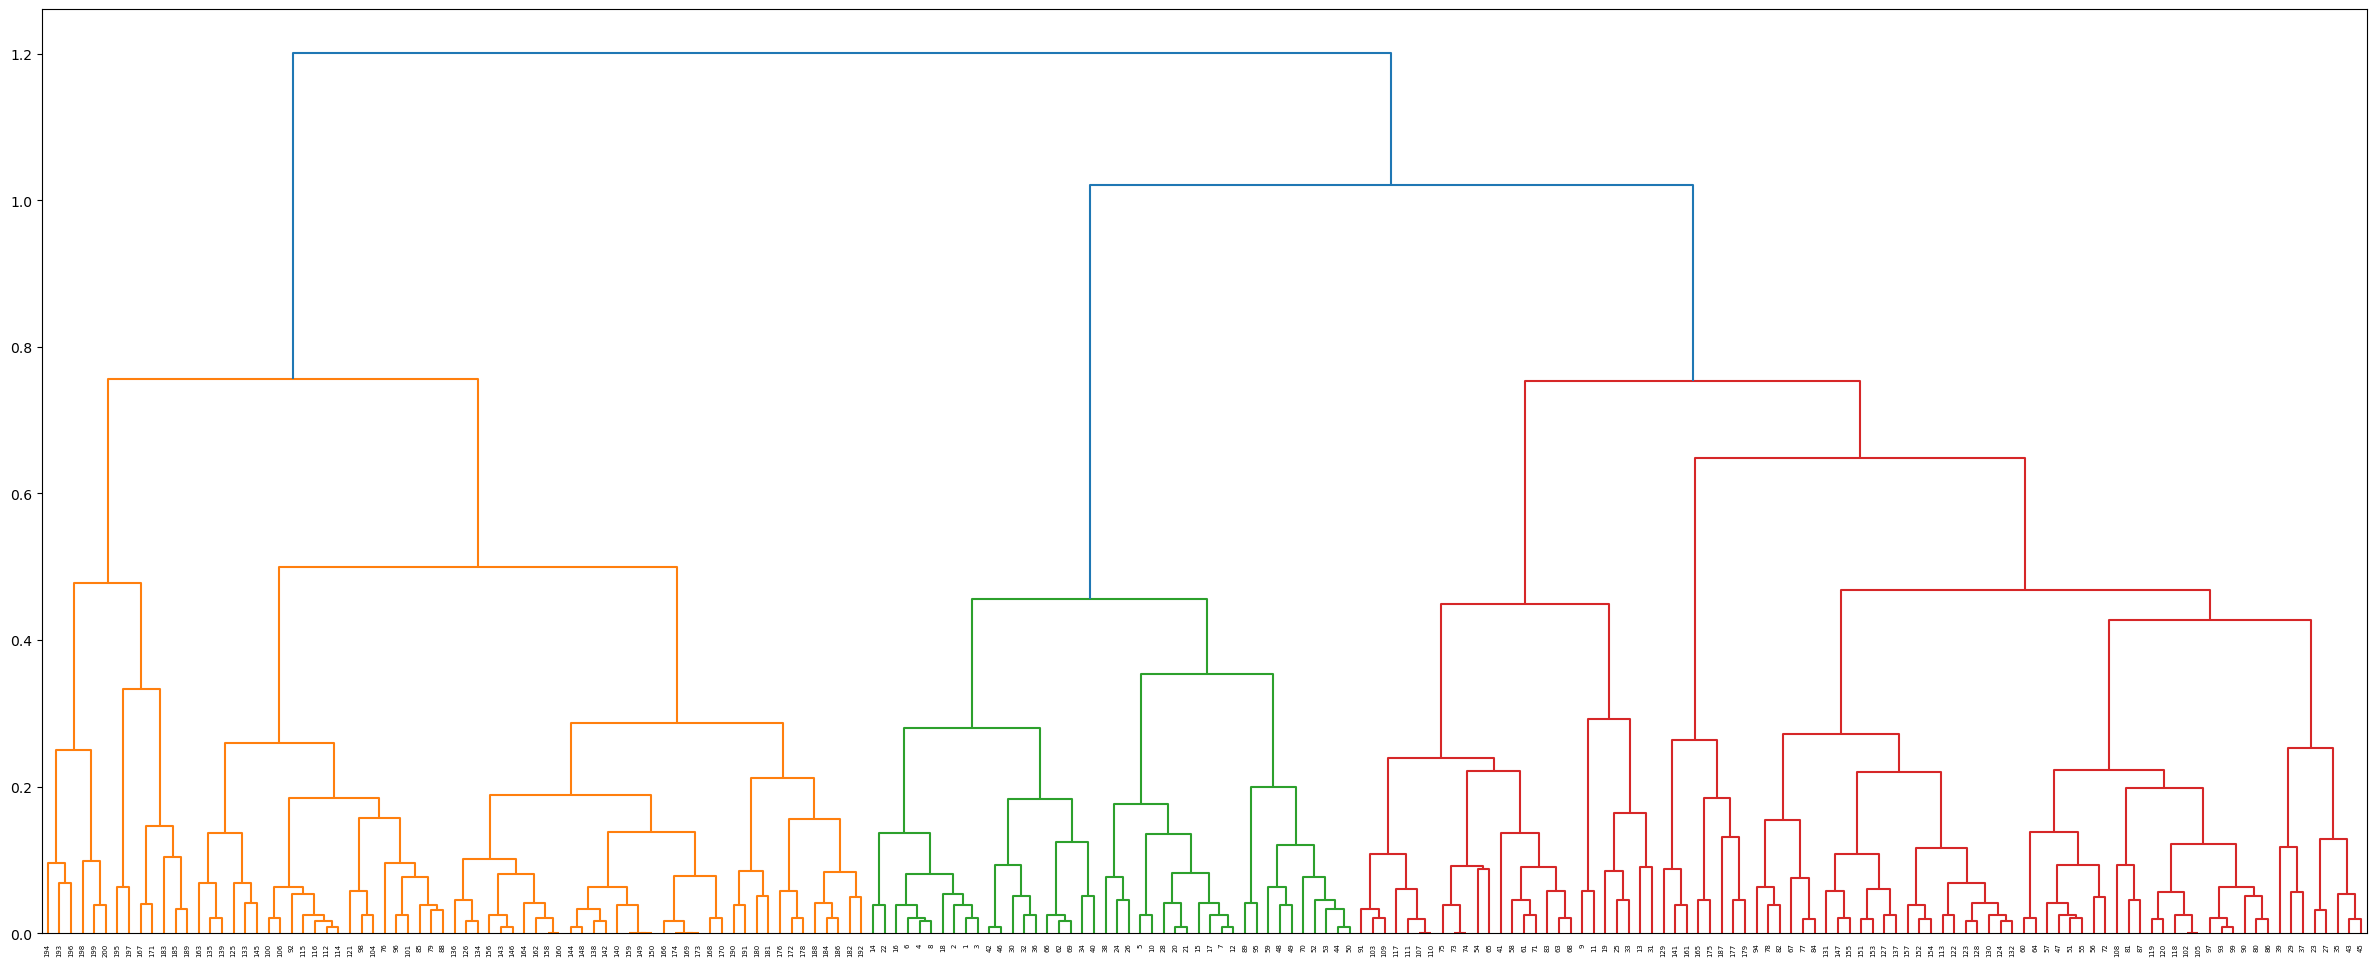

In [13]:
# call function for model and graph
heir_and_graph(X,"complete", "euclidean")

## Agglomerative Cluster with Sckit-learn

In [14]:
# funstion for Graphing Agglomerative Cluster with Sckit-learn
def graph_cluster_agg(X,clusters):
    for i in range(X.shape[0]):
        if clusters[i] == 0:
            plt.scatter(X[i,0], X[i,1], color='blue', s = 50)
        elif clusters[i] == 1:
            plt.scatter(X[i,0], X[i,1], color='green', s = 50)
        elif clusters[i] == 2:
            plt.scatter(X[i,0], X[i,1], color='black', s = 50)
        elif clusters[i] == 3:
            plt.scatter(X[i,0], X[i,1], color='orange', s = 50)
        elif clusters[i] == 4:
            plt.scatter(X[i,0], X[i,1], color='grey', s = 50)
        else:
            plt.scatter(X[i,0], X[i,1], color='yellow', s = 50)  # just in case...
   
    plt.show() 

In [15]:
# funstion for Agglomerative Cluster with Sckit-learn
from sklearn.cluster import AgglomerativeClustering as agg_cluster

def model_graph(X, method, distance,):
    agg_model = agg_cluster(n_clusters = 3, linkage = distance, affinity = method)  #  Agglomerate clustering
    agg_model.fit(X)
    clusters = agg_model.fit_predict(X)
    #print(clusters)

    # prety graph
    graph_cluster_agg(X,clusters)

### Invoke

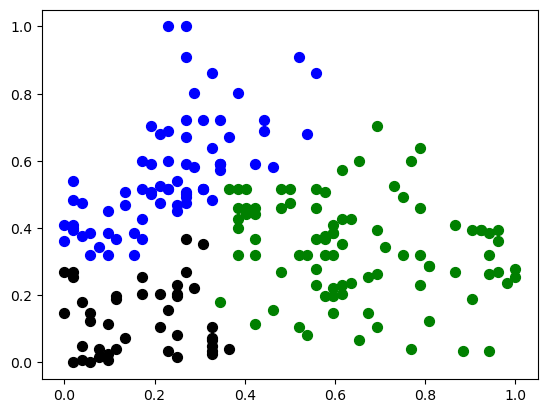

In [16]:
model_graph(X, 'euclidean', 'complete')

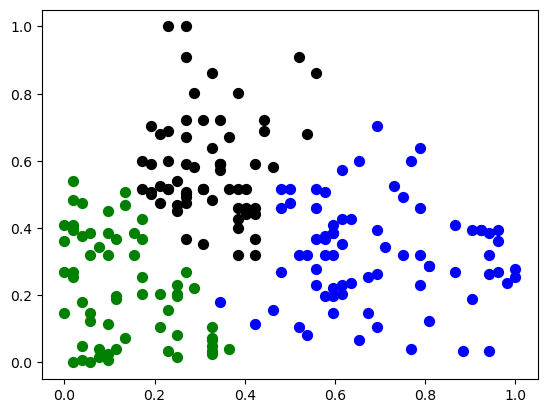

In [17]:
model_graph(X, 'euclidean', 'ward')

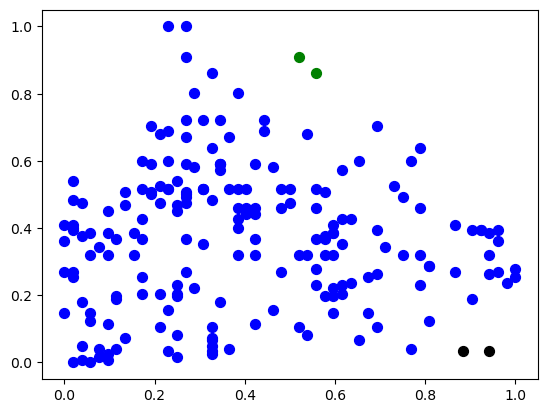

In [18]:
model_graph(X, 'euclidean', 'single')

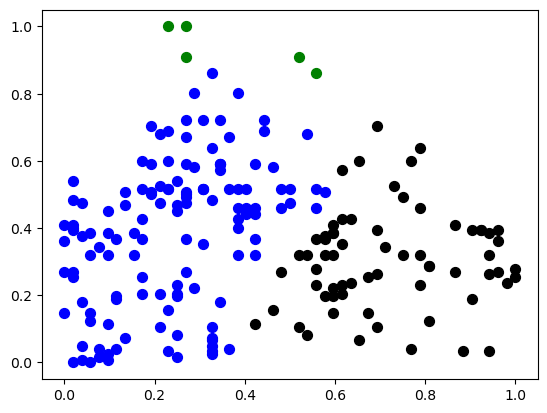

In [19]:
model_graph(X, 'euclidean', 'average')

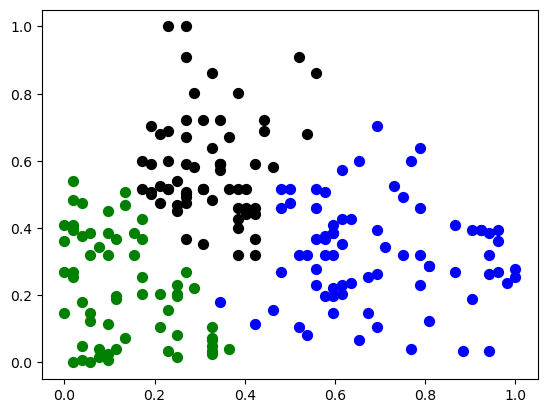

In [20]:
model_graph(X, 'euclidean', 'ward')

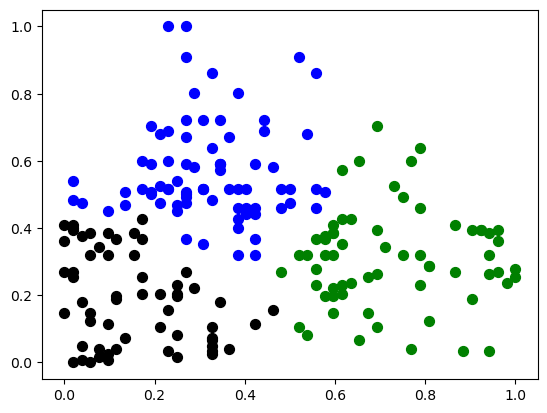

In [21]:
model_graph(X, 'manhattan', 'complete')

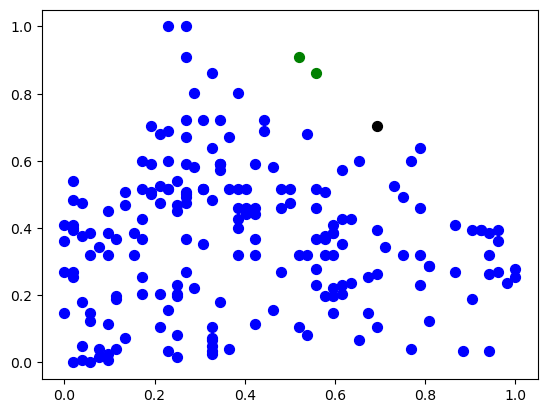

In [22]:
model_graph(X, 'manhattan', 'single')

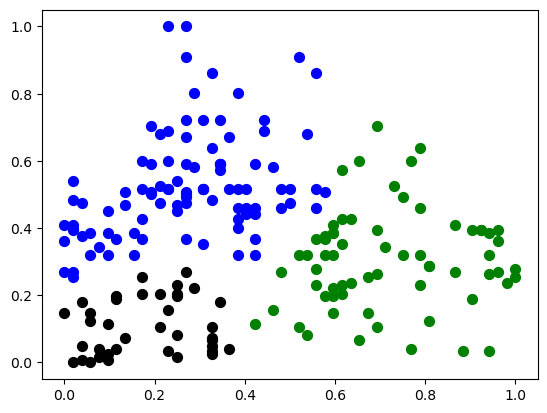

In [23]:
model_graph(X, 'manhattan', 'average')